# Vérification de la conduction thermique stationnaire avec terme source :  terme source linéaire

In [1]:
from trustutils import run 
run.introduction("D.Jamet, Y.Gorsse","25/05/2021")
run.description('On considere un probleme de conduction thermique stationnaire avec un terme source volumique variant linéairement dans la direction 𝑥. On compare la solution obtenue par CoviMAC à la solution analytique. La température est imposée en entrée et sortie du domaine (cf. jeu de données). On compare le profil de température dans la direction 𝑥 ainsi que le champ de température bidimensionnel. On compare également les flux conductifs sur les parois en entrée et sortie')
run.TRUST_parameters()

## Introduction 
 Validation made by : D.Jamet, Y.Gorsse



 Report created : 25/05/2021



 Report generated 26/01/2022

### Description 
On considere un probleme de conduction thermique stationnaire avec un terme source volumique variant linéairement dans la direction 𝑥. On compare la solution obtenue par CoviMAC à la solution analytique. La température est imposée en entrée et sortie du domaine (cf. jeu de données). On compare le profil de température dans la direction 𝑥 ainsi que le champ de température bidimensionnel. On compare également les flux conductifs sur les parois en entrée et sortie

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/Verification/CoviMAC/conduction_stationnaire_2/build)

In [2]:
from trustutils import run 
c1 = run.addCase("cartesian","jdd.data")
c2 = run.addCase("triangle","jdd.data")
c3 = run.addCase("non_conformal","jdd.data")
run.printCases()
run.runCases()

### Test cases 
* cartesian/jdd.data : 
* triangle/jdd.data : 
* non_conformal/jdd.data : 


Running **with Sserver**...
  => A total of 3 cases were (successfully) run in 0.7s.


## Champs de température
On compare les champs de température calculé par PolyMAC et analytique.  Cette comparaison se faitsur un profil eny=cteet sur le champ 2D.
### Comparaison des profils calculé et analytique

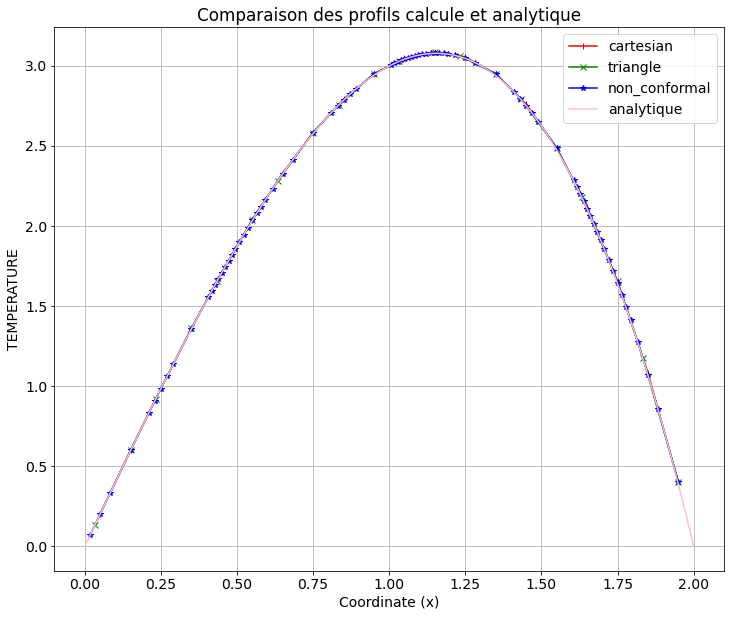

In [3]:
from trustutils.jupyter import plot
import numpy as np

Graphique=plot.Graph("Comparaison des profils calcule et analytique")
Graphique.addSegment("./cartesian/jdd_TEMPERATURE_X.son"    ,label="cartesian"    ,color="r",marker="-|",nb=3)
Graphique.addSegment("./triangle/jdd_TEMPERATURE_X.son"     ,label="triangle"     ,color="g",marker="-x",nb=3)
Graphique.addSegment("./non_conformal/jdd_TEMPERATURE_X.son",label="non_conformal",color="b",marker="-*",nb=4)
x=np.linspace(0,2,100)
y=-3./(6.*0.25)*x/2.*((x*x-2.*2.))
Graphique.add(x,y,label="analytique",color="pink")

### Comparaison des champs 2D calculé et analytique
On trace le champ d’écart entre la température calculée et la solution analytique. La solution analytique est représentée par des isovaleurs du champ de température.

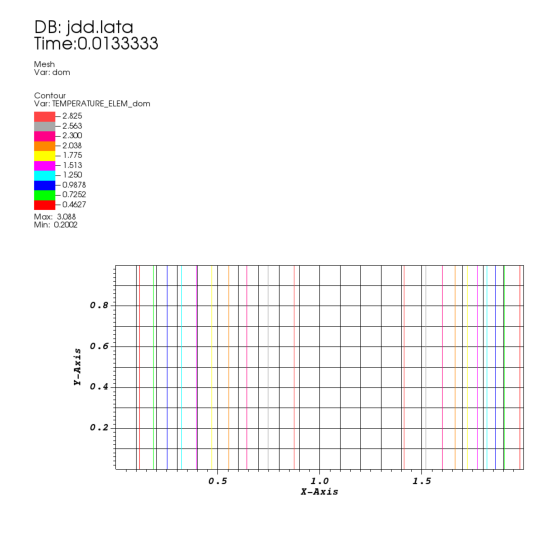

In [4]:
from trustutils import visitutils as visit
plot=visit.showField("./cartesian/jdd.lata","Contour","TEMPERATURE_ELEM_dom") 

## Flux conductifs aux frontieres du domaine
Les flux conductifs calculés par GENEPI en $x= 0$ et $x=L$ sont comparés aux flux théoriques.  L’erreur correspondante est également donnée.

### Comparaison théorie/numérique

In [5]:
from trustutils.jupyter import plot
import numpy as np

ref = [-1,-2]

Tableau=plot.Table(["flux  gauche"  , "flux droit"])
Tableau.addLigne([ref],"theorie")

data=plot.loadText("cartesian/cond_fin.out")
Tableau.addLigne([data[1:3]],"cartesian")
err_cart = list(map(lambda a,b: int((b - a)/b*10000)/100., data[1:3],ref))
Tableau.addLigne([err_cart],"erreur en %")

data=plot.loadText("triangle/cond_fin.out")
Tableau.addLigne([data[1:3]],"triangle")
err_cart = list(map(lambda a,b: int((b - a)/b*10000)/100., data[1:3],ref))
Tableau.addLigne([err_cart],"erreur en %")

data=plot.loadText("non_conformal/cond_fin.out")
Tableau.addLigne([data[1:3]],"non_conformal")
err_cart = list(map(lambda a,b: int((b - a)/b*10000)/100., data[1:3],ref))
Tableau.addLigne([err_cart],"erreur en %")

Tableau.df 

,flux gauche,flux droit
theorie,-1,-2
cartesian,-1.00125,-1.99875
erreur en %,-0.12,0.06
triangle,-1.001089,-1.998911
erreur en %,-0.1,0.05
non_conformal,-1.000518,-1.999482
erreur en %,-0.05,0.02


## Data Files
### jdd

In [6]:
run.dumpDataset("./cartesian/jdd.data")

 # PARALLEL OK #
 dimension 2
 Pb_conduction pb
 Domaine dom
 
 # BEGIN MESH #
 Lire_med family_names_from_group_names dom mesh mesh.med
 # END MESH #
 
 # BEGIN PARTITION
 Postraiter_domaine
 {
     fichier mesh.lata
     format lata
     domaine dom
 }
 
 Partition dom
 {
     Partition_tool tranche { tranches 2 1 }
     larg_joint 2
     zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 CoviMAC  dis
 
 Schema_euler_implicite sch
 Read sch
 {
     tinit 0
     dt_max  1
     seuil_statio 1e-8
     solveur implicite
     {
         solveur petsc cli { }
     }
 }
 
 Solide sol
 Read sol
 {
     rho Champ_Uniforme 1 1.
     lambda Champ_Uniforme 1 0.25
     Cp Champ_Uniforme 1 1.
 }
 Associate pb dom
 Associate pb sch
 Associate pb sol
 
 Discretize pb dis
 
 Read pb
 {
     Conduction
     {
         diffusion { }
         sources { Puissance_thermique Champ_Fonc_XYZ dom 1 3*x/2 }
         initial_conditions { temperature Champ_Uniform

### jdd

In [7]:
from trustutils import run
run.dumpDataset("./triangle/jdd.data")

 # PARALLEL OK #
 dimension 2
 Pb_conduction pb
 Domaine dom
 
 # BEGIN MESH #
 Lire_med family_names_from_group_names dom mesh mesh.med
 # END MESH #
 
 # BEGIN PARTITION
 Postraiter_domaine
 {
     fichier mesh.lata
     format lata
     domaine dom
 }
 
 Partition dom
 {
     Partition_tool tranche { tranches 2 1 }
     larg_joint 2
     zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 CoviMAC  dis
 
 Schema_euler_implicite sch
 Read sch
 {
     tinit 0
     dt_max  1
     seuil_statio 1e-8
     solveur implicite
     {
         solveur petsc cli { }
     }
 }
 
 Solide sol
 Read sol
 {
     rho Champ_Uniforme 1 1.
     lambda Champ_Uniforme 1 0.25
     Cp Champ_Uniforme 1 1.
 }
 Associate pb dom
 Associate pb sch
 Associate pb sol
 
 Discretize pb dis
 
 Read pb
 {
     Conduction
     {
         diffusion { }
         sources { Puissance_thermique Champ_Fonc_XYZ dom 1 3*x/2 }
         initial_conditions { temperature Champ_Uniform

### jdd

In [8]:
from trustutils import run
run.dumpDataset("./non_conformal/jdd.data")

 # PARALLEL OK #
 dimension 2
 Pb_conduction pb
 Domaine dom
 
 # BEGIN MESH #
 Lire_med family_names_from_group_names dom mesh mesh.med
 # END MESH #
 
 # BEGIN PARTITION
 Postraiter_domaine
 {
     fichier mesh.lata
     format lata
     domaine dom
 }
 
 Partition dom
 {
     Partition_tool tranche { tranches 2 1 }
     larg_joint 2
     zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 CoviMAC  dis
 
 Schema_euler_implicite sch
 Read sch
 {
     tinit 0
     dt_max  1
     seuil_statio 1e-8
     solveur implicite
     {
         solveur petsc cli { }
     }
 }
 
 Solide sol
 Read sol
 {
     rho Champ_Uniforme 1 1.
     lambda Champ_Uniforme 1 0.25
     Cp Champ_Uniforme 1 1.
 }
 Associate pb dom
 Associate pb sch
 Associate pb sol
 
 Discretize pb dis
 
 Read pb
 {
     Conduction
     {
         diffusion { }
         sources { Puissance_thermique Champ_Fonc_XYZ dom 1 3*x/2 }
         initial_conditions { temperature Champ_Uniform